In [50]:
# 1. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

In [51]:
# 2. Load Data
df = pd.read_csv("C:\\Users\\KIIT\\Downloads\\employee_data.csv")
print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (100, 8)
   EmployeeID           Name  Age   Department  Salary  YearsAtCompany  \
0           1       John Doe   29        Sales   55000               3   
1           2     Jane Smith   35           HR   60000               7   
2           3  Michael Brown   40  Engineering   80000              10   
3           4    Emily Davis   28    Marketing   65000               5   
4           5  David Johnson   50        Sales   75000              20   

   PerformanceScore Attrition  
0                80        No  
1                85        No  
2                95       Yes  
3                78        No  
4                88       Yes  


In [52]:
print(df.info())
print("Missing Values:\n", df.isnull().sum())

# Drop duplicates
df = df.drop_duplicates()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   EmployeeID        100 non-null    int64 
 1   Name              100 non-null    object
 2   Age               100 non-null    int64 
 3   Department        100 non-null    object
 4   Salary            100 non-null    int64 
 5   YearsAtCompany    100 non-null    int64 
 6   PerformanceScore  100 non-null    int64 
 7   Attrition         100 non-null    object
dtypes: int64(5), object(3)
memory usage: 6.4+ KB
None
Missing Values:
 EmployeeID          0
Name                0
Age                 0
Department          0
Salary              0
YearsAtCompany      0
PerformanceScore    0
Attrition           0
dtype: int64


In [53]:
# Handle missing values (example: fill numerical with mean, categorical with mode)
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())

# 4. Descriptive Statistics
print(df.describe(include="all"))

        EmployeeID          Name         Age   Department        Salary  \
count   100.000000           100  100.000000          100    100.000000   
unique         NaN            98         NaN            4           NaN   
top            NaN  James Walker         NaN  Engineering           NaN   
freq           NaN             2         NaN           28           NaN   
mean     50.500000           NaN   36.570000          NaN  72820.000000   
std      29.011492           NaN    8.318478          NaN  12643.823102   
min       1.000000           NaN   25.000000          NaN  43000.000000   
25%      25.750000           NaN   29.750000          NaN  65000.000000   
50%      50.500000           NaN   35.000000          NaN  72000.000000   
75%      75.250000           NaN   41.250000          NaN  82750.000000   
max     100.000000           NaN   60.000000          NaN  95000.000000   

        YearsAtCompany  PerformanceScore Attrition  
count       100.000000        100.000000      


Overall Attrition Rate (%):
 Attrition
No     61.0
Yes    39.0
Name: proportion, dtype: float64


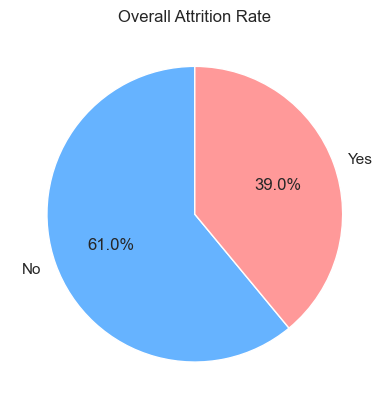

In [54]:
# 2. KPI 1 - Overall Attrition Rate
attrition_rate = df['Attrition'].value_counts(normalize=True) * 100
print("\nOverall Attrition Rate (%):\n", attrition_rate)

plt.pie(df['Attrition'].value_counts(), labels=df['Attrition'].value_counts().index,
        autopct='%1.1f%%', colors=["#66b3ff", "#ff9999"], startangle=90)
plt.title("Overall Attrition Rate")
plt.show()


Attrition % by Department:
 Attrition           No        Yes
Department                       
Engineering  57.142857  42.857143
HR           65.384615  34.615385
Marketing    80.000000  20.000000
Sales        46.153846  53.846154


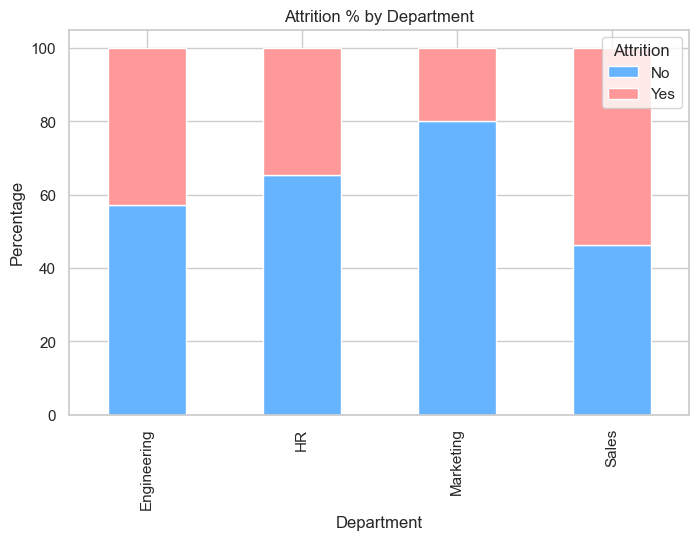

In [55]:
# 3. KPI 2 - Attrition by Department

dept_attrition = df.groupby("Department")['Attrition'].value_counts(normalize=True).unstack() * 100
print("\nAttrition % by Department:\n", dept_attrition)

dept_attrition.plot(kind="bar", stacked=True, figsize=(8,5), color=["#66b3ff","#ff9999"])
plt.title("Attrition % by Department")
plt.ylabel("Percentage")
plt.show()


Attrition % by Age Band:
 Attrition    No   Yes
AgeBand              
21-30      80.0  20.0
31-40      57.5  42.5
41-50      50.0  50.0
51-60      25.0  75.0


C:\Users\KIIT\AppData\Local\Temp\ipykernel_17628\472400875.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_attrition = df.groupby("AgeBand")['Attrition'].value_counts(normalize=True).unstack() * 100


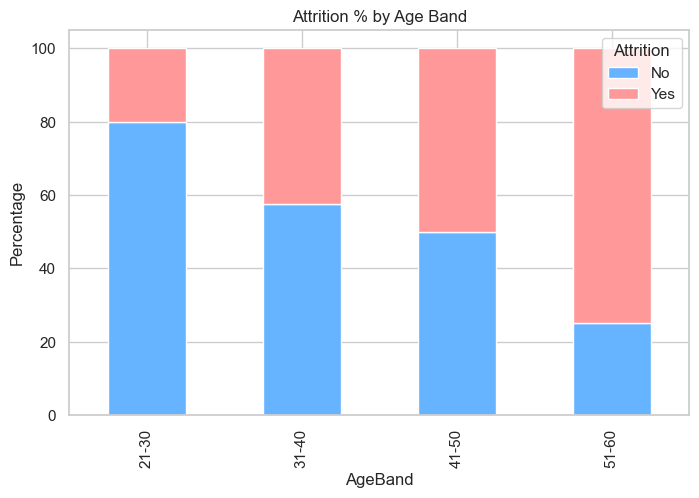

In [56]:
# 4. KPI 3 - Attrition by Age Band

df['AgeBand'] = pd.cut(df['Age'], bins=[20,30,40,50,60], labels=["21-30","31-40","41-50","51-60"])
age_attrition = df.groupby("AgeBand")['Attrition'].value_counts(normalize=True).unstack() * 100
print("\nAttrition % by Age Band:\n", age_attrition)

age_attrition.plot(kind="bar", stacked=True, figsize=(8,5), color=["#66b3ff","#ff9999"])
plt.title("Attrition % by Age Band")
plt.ylabel("Percentage")
plt.show()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_17628\3317589663.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salary_attrition = df.groupby("SalaryBand")['Attrition'].value_counts(normalize=True).unstack() * 100



Attrition % by Salary Band:
 Attrition          No        Yes
SalaryBand                      
<50k        75.000000  25.000000
50k-70k     69.047619  30.952381
70k-90k     55.813953  44.186047
>90k        45.454545  54.545455


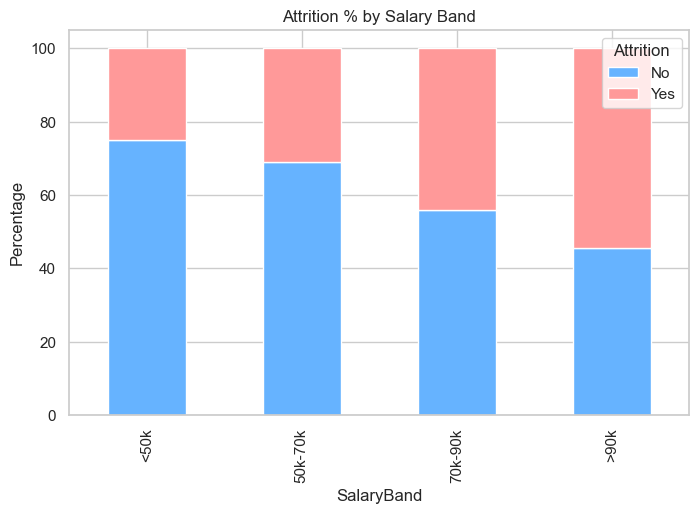

In [57]:
# 5. KPI 4 - Attrition by Salary Band
df['SalaryBand'] = pd.cut(df['Salary'], bins=[0,50000,70000,90000,110000], 
                          labels=["<50k","50k-70k","70k-90k",">90k"])
salary_attrition = df.groupby("SalaryBand")['Attrition'].value_counts(normalize=True).unstack() * 100
print("\nAttrition % by Salary Band:\n", salary_attrition)

salary_attrition.plot(kind="bar", stacked=True, figsize=(8,5), color=["#66b3ff","#ff9999"])
plt.title("Attrition % by Salary Band")
plt.ylabel("Percentage")
plt.show()


Attrition % by Years at Company:
 Attrition               No         Yes
YearsAtCompany                        
1               100.000000         NaN
2                33.333333   66.666667
3                66.666667   33.333333
4               100.000000         NaN
5                66.666667   33.333333
6                80.000000   20.000000
7                75.000000   25.000000
8                66.666667   33.333333
9               100.000000         NaN
10               66.666667   33.333333
11              100.000000         NaN
12               66.666667   33.333333
13                     NaN  100.000000
14               50.000000   50.000000
15               75.000000   25.000000
16               60.000000   40.000000
17               50.000000   50.000000
18               50.000000   50.000000
19                     NaN  100.000000
20               16.666667   83.333333
21                     NaN  100.000000
22               50.000000   50.000000
25               50.000000   

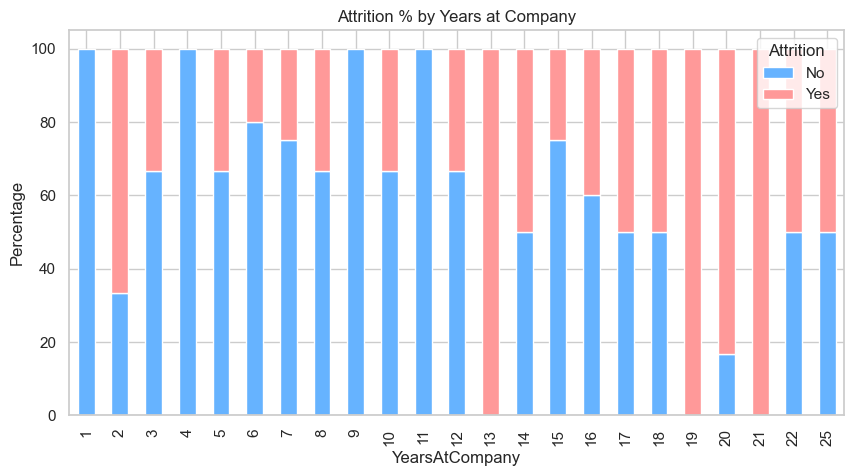

In [58]:
# 6. KPI 5 - Attrition by Years at Company
tenure_attrition = df.groupby("YearsAtCompany")['Attrition'].value_counts(normalize=True).unstack() * 100
print("\nAttrition % by Years at Company:\n", tenure_attrition)

tenure_attrition.plot(kind="bar", stacked=True, figsize=(10,5), color=["#66b3ff","#ff9999"])
plt.title("Attrition % by Years at Company")
plt.ylabel("Percentage")
plt.show()

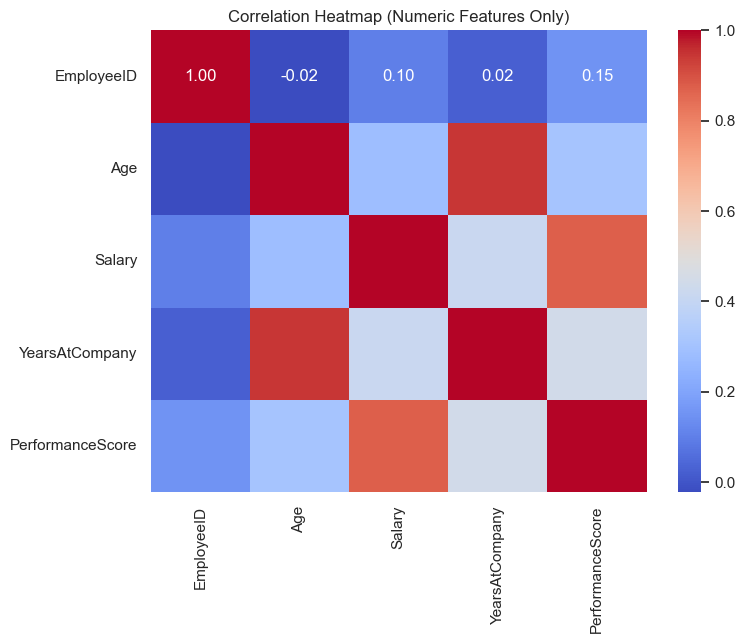

In [60]:
numeric_df = df.select_dtypes(include=['int64','float64'])
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

In [64]:
# 8. Business Insights
print("\n--- Business Insights ---")
print(f"1. Overall attrition rate is {attrition_rate['Yes']:.1f}% (quite high compared to industry benchmarks).")

print("2. Sales (53.8%) and Engineering (42.9%) departments show the highest attrition, "
      "while Marketing (20%) has the lowest.")

print("3. Attrition increases with age: lowest in 21–30 yrs (20%) but very high in 51–60 yrs (75%).")

print("4. Higher-salary employees (>90k) surprisingly show the highest attrition (55%), "
      "indicating dissatisfaction beyond pay.")

print("5. Tenure analysis shows early exits (within 2 years = 66.7%) and long-tenure exits "
      "(20+ years = 80%+), suggesting onboarding and career planning issues.")



--- Business Insights ---
1. Overall attrition rate is 39.0% (quite high compared to industry benchmarks).
2. Sales (53.8%) and Engineering (42.9%) departments show the highest attrition, while Marketing (20%) has the lowest.
3. Attrition increases with age: lowest in 21–30 yrs (20%) but very high in 51–60 yrs (75%).
4. Higher-salary employees (>90k) surprisingly show the highest attrition (55%), indicating dissatisfaction beyond pay.
5. Tenure analysis shows early exits (within 2 years = 66.7%) and long-tenure exits (20+ years = 80%+), suggesting onboarding and career planning issues.
